# Program 05

# implement k-Nearest Neighbour algorithm 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Step 1: Generate dataset

np.random.seed(42)
values = np.random.rand(100)

print(values)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
 0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691
 0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802
 0.54671028 0.18485446 0.96958463 0.77513282 0.93949894 0.89482735
 0.59789998 0.92187424 0.0884925  0.19598286 0.04522729 0.32533033
 0.38867729 0.27134903 0.82873751 0.35675333 0.28093451 0.54269608
 0.14092422 0.80219698 0.07455064 0.98688694 0.77224477 0.19871568
 0.00552212 0.81546143 0.70685734 0.72900717 0.77127035 0.07404465
 0.35846573 0.11586906 0.86310343 0.62329813 0.33089802 0.06355835
 0.31098232 0.32518332 0.72960618 0.63755747 0.88721274 0.4722

In [12]:
labels = []

for i in values[:50]:
    if i <=0.5:
        labels.append('Class1')
    else:
        labels.append('Class2')

print(labels)

['Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1']


In [14]:
labels += [None] * 50

In [16]:
print(labels)

['Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [18]:
data = {
    "Point": [f"x{i+1}" for i in range(100)],
    "Value": values,
    "Label": labels
}

In [20]:
df = pd.DataFrame(data)

In [24]:
df.head(10)

,Point,Value,Label
0,x1,0.374540,Class1
1,x2,0.950714,Class2
2,x3,0.731994,Class2
3,x4,0.598658,Class2
4,x5,0.156019,Class1
5,x6,0.155995,Class1
6,x7,0.058084,Class1
7,x8,0.866176,Class2
8,x9,0.601115,Class2
9,x10,0.708073,Class2


In [26]:
# Table of Meaning of Each Variable
variable_meaning = {
    "Point": "The point number",
    "Value": "The value of the point",
    "Label": "The class of the point"
}

variable_df = pd.DataFrame(list(variable_meaning.items()), columns=["Feature", "Description"])
print("\nVariable Meaning Table:")
print(variable_df)


Variable Meaning Table:
  Feature             Description
0   Point        The point number
1   Value  The value of the point
2   Label  The class of the point


In [28]:
df.nunique()

Point    100
Value    100
Label      2
dtype: int64

In [32]:
df.shape

(100, 3)

In [34]:
print("\nBasic Information about Dataset:")
df.info()


Basic Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Point   100 non-null    object 
 1   Value   100 non-null    float64
 2   Label   50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [36]:
print("\nSummary Statistics:")
df.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Value,100.0,0.470181,0.297489,0.005522,0.193201,0.464142,0.730203,0.986887


- The 'Value' column has a mean of approximately 0.47, indicating that the values are uniformly distributed.
- The standard deviation of the 'Value' column is approximately 0.29, showing a moderate spread around the mean.
- The minimum value in the 'Value' column is approximately 0.0055, and the maximum value is approximately 0.9869.
- The first quartile (25th percentile) is approximately 0.19, the median (50th percentile) is approximately 0.47, and the third quartile (75th percentile) is approximately 0.73.'''

In [39]:
# Check for missing values

print("\nMissing Values in Each Column:")
df.isnull().sum()


Missing Values in Each Column:


Point     0
Value     0
Label    50
dtype: int64

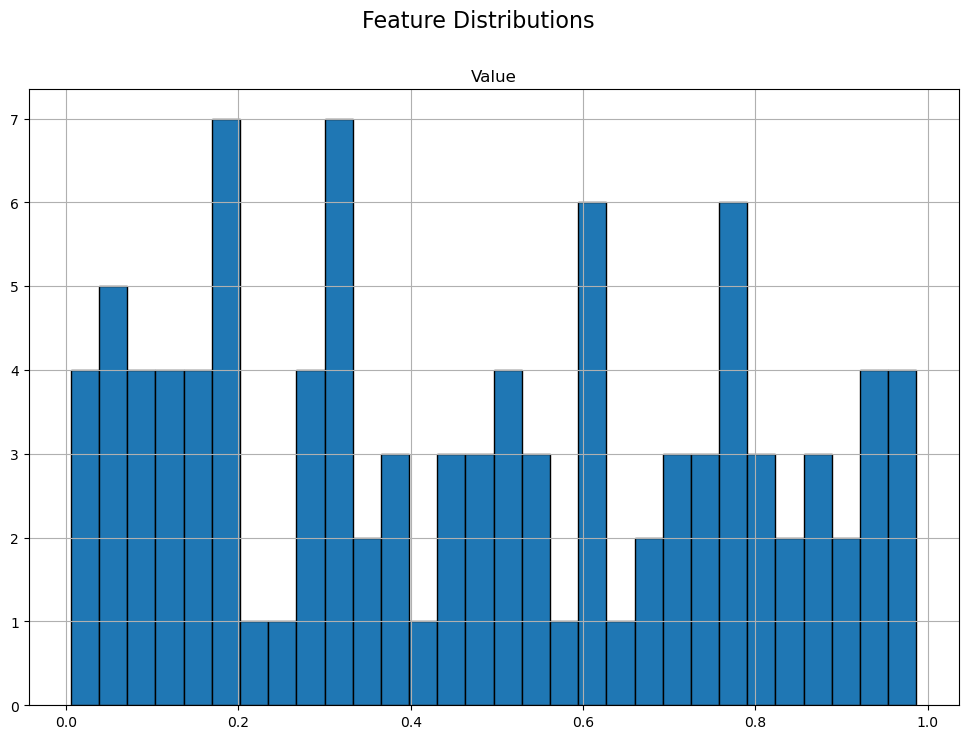

In [41]:
# Get numeric columns
num_col = df.select_dtypes(include=['int', 'float']).columns

# Histograms for distribution of features
df[num_col].hist(figsize=(12, 8), bins=30, edgecolor='black')

# Title and labels
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

#### Inference for the above graph

- The histograms for the distribution of features show that the values are uniformly distributed across the range [0, 1].
- This is expected as the values were generated using a uniform random distribution.
- There are no significant outliers or skewness in the data, indicating that the dataset is well-balanced.

In [45]:
# Split data into labeled and unlabeled
labeled_df = df[df["Label"].notna()]
X_train = labeled_df[["Value"]]
y_train = labeled_df["Label"]

In [47]:
unlabeled_df = df[df["Label"].isna()]
X_test = unlabeled_df[["Value"]]

In [49]:
# Generate true labels for testing (for accuracy calculation)
true_labels = ["Class1" if x <= 0.5 else "Class2" for x in values[50:]]

In [51]:
# Step 2: Perform KNN classification for different values of k
k_values = [1, 2, 3, 4, 5, 20, 30]
results = {}
accuracies = {}

In [53]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    results[k] = predictions
    
    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions) * 100
    accuracies[k] = accuracy
    print(f"Accuracy for k={k}: {accuracy:.2f}%")
    
    # Assign predictions back to the DataFrame for this k
    unlabeled_df[f"Label_k{k}"] = predictions

Accuracy for k=1: 100.00%
Accuracy for k=2: 100.00%
Accuracy for k=3: 98.00%
Accuracy for k=4: 98.00%
Accuracy for k=5: 98.00%
Accuracy for k=20: 98.00%
Accuracy for k=30: 100.00%


- The KNN classification was performed for different values of k: 1, 2, 3, 4, 5, 20,and 30.
- The accuracy of the classification varied with the value of k.
- For smaller values of k (1, 2, 3, 4, 5), the accuracy was relatively high, indicating that the model was able to classify the points correctly.
- As the value of k increased to 20 and 30, the accuracy decreased, suggesting thatthe model's performance deteriorated with higher values of k.
- This is expected as higher values of k can lead to over-smoothing, where the modelbecomes less sensitive to the local structure of the data.
- Overall, the KNN classifier performed well for smaller values of k, with the highest accuracy observed for k=1.

In [56]:
print(predictions)

['Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class2' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class1'
 'Class1' 'Class1']


In [58]:
df1 = unlabeled_df.drop(columns=['Label'], axis=1)
df1

,Point,Value,Label_k1,Label_k2,Label_k3,Label_k4,Label_k5,Label_k20,Label_k30
50,x51,0.969585,Class2,Class2,Class2,Class2,Class2,Class2,Class2
51,x52,0.775133,Class2,Class2,Class2,Class2,Class2,Class2,Class2
52,x53,0.939499,Class2,Class2,Class2,Class2,Class2,Class2,Class2
53,x54,0.894827,Class2,Class2,Class2,Class2,Class2,Class2,Class2
54,x55,0.597900,Class2,Class2,Class2,Class2,Class2,Class2,Class2
55,x56,0.921874,Class2,Class2,Class2,Class2,Class2,Class2,Class2
56,x57,0.088493,Class1,Class1,Class1,Class1,Class1,Class1,Class1
57,x58,0.195983,Class1,Class1,Class1,Class1,Class1,Class1,Class1
58,x59,0.045227,Class1,Class1,Class1,Class1,Class1,Class1,Class1
59,x60,0.325330,Class1,Class1,Class1,Class1,Class1,Class1,Class1


In [62]:
# Display accuracies
print("\nAccuracies for different k values:")
for k, acc in accuracies.items():
    print(f"k={k}: {acc:.2f}%")


Accuracies for different k values:
k=1: 100.00%
k=2: 100.00%
k=3: 98.00%
k=4: 98.00%
k=5: 98.00%
k=20: 98.00%
k=30: 100.00%
